<a href="https://colab.research.google.com/github/apoorvyadav1111/Machine-Learning-pytorch/blob/master/Neural%20Network%20for%20MNIST%20using%20pytorch%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

tcmalloc: large alloc 1073750016 bytes == 0x57646000 @  0x7f35ad7132a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


## Import libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from torchvision import datasets, transforms

## Create a transform and load the data

We need to convert the image into a tensor and normalize them.

In [7]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

Processing...
Done!


## Checking the dimensions of the data

In [8]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


## Plotting the Image

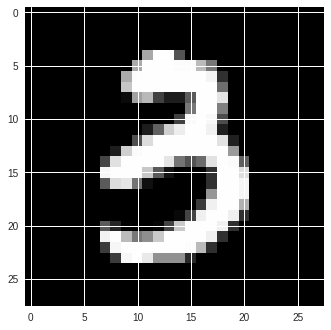

In [9]:
plt.imshow(images[0].squeeze(),cmap='Greys_r')

## Creating the Model using nn.Module
We will create a neural network with two hidden layers. We use ReLU activations for the hidden layers and LogSoftmax for the last layer

In [0]:
from torch import nn

In [0]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.output = nn.Linear(64,10)
    
    self.sigmoid = nn.ReLU()
    self.softmax = nn.LogSoftmax(dim=1)
  
  def forward(self, x):
    
    x = self.sigmoid(self.fc1(x))
    x = self.sigmoid(self.fc2(x))
    out = self.softmax(self.output(x))
    return out    

In [0]:
model = Network()

## We can check the model architecture down below

In [32]:
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
  (sigmoid): ReLU()
  (softmax): LogSoftmax()
)

In [33]:
model.fc1.bias.data.fill_(0)
model.fc2.bias.data.fill_(0)
model.output.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Defining the loss

In [0]:
criterion = nn.NLLLoss()

## Defining the optimizer 
we have a lot of choices here, SGD, Adam, AdaDelta, Adagrad etc

In [0]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr = 0.003)

## Training Loop

In [36]:
epochs = 10
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    
    images = images.view(images.shape[0],-1)
  
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
  
    running_loss += loss.item()
  else:
    print( f"Training Loss: {running_loss/len(trainloader)}")

Training Loss: 1.9595477245509751
Training Loss: 0.9091873150835159
Training Loss: 0.5405891023592145
Training Loss: 0.43681477383573425
Training Loss: 0.38880730711066647
Training Loss: 0.36129304795249945
Training Loss: 0.3425475183262754
Training Loss: 0.3280834875889678
Training Loss: 0.3163398734287921
Training Loss: 0.3064454868594721


## Visualizing the output predictions

(0, 1.1)

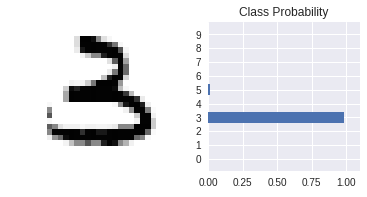

In [44]:
%matplotlib inline
images, labels = next(iter(trainloader))

img = images[0].view(1,784)

with torch.no_grad():
  logps = model(img)
  
ps = torch.exp(logps)

ps = ps.data.numpy().squeeze()

fig, (ax1,ax2) = plt.subplots(figsize=(6,9),ncols =2)
ax1.imshow(img.resize_(1,28,28).numpy().squeeze())
ax1.axis('off')
ax2.barh(np.arange(10),ps)
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
ax2.set_yticklabels(np.arange(10))
ax2.set_title('Class Probability')
ax2.set_xlim(0, 1.1)
